In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

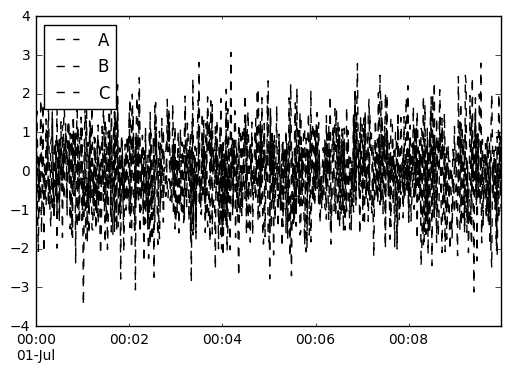

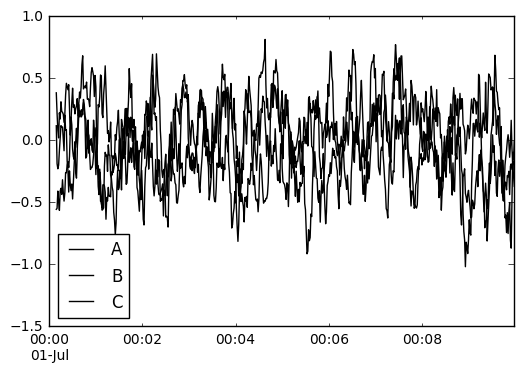

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/home/kliton/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,adjust=True,ignore_na=False,min_periods=2).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,1.290014,-1.158374,0.571409
2016-07-01 00:00:02,1.000022,-0.625643,-0.088694
2016-07-01 00:00:03,0.495144,-0.341609,-0.687366
2016-07-01 00:00:04,0.468807,-0.522079,-0.494962
2016-07-01 00:00:05,0.279491,-0.440546,-0.545439
2016-07-01 00:00:06,0.195386,-0.405370,-0.049774
2016-07-01 00:00:07,0.187735,-0.631265,-0.006757
2016-07-01 00:00:08,0.235620,-0.524060,0.010091
2016-07-01 00:00:09,0.351756,-0.558566,0.305261


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,-1.071361,0.039204,0.243375,-1.005179
2016-06-07,0.428431,1.225899,-0.410054,-0.093903
2016-06-08,0.248769,-1.780763,0.483987,1.495985
2016-06-09,0.489642,-0.509236,0.430822,-1.403045
2016-06-10,0.128253,1.225764,-1.471430,0.608754


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4448ace80>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ff43ef54080>], dtype=object)

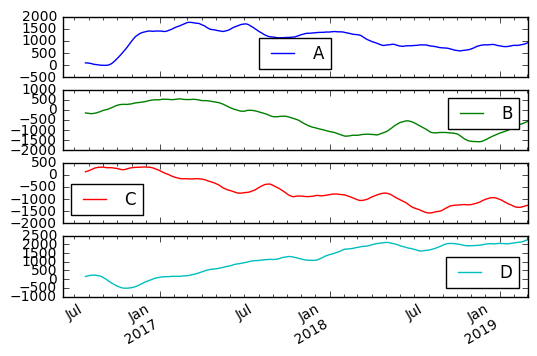

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.594832,0.572612,1.111627,0.825764


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.857146,0.652153,0.038348,-1.052130
2016-06-08,-0.702818,0.262882,0.131335,-0.569119
2016-06-09,-0.503243,-0.059062,0.285534,-0.678375
2016-06-10,-0.357848,-0.007076,0.083768,-0.622177


In [ ]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

In [ ]:
# EWMA
# Why use EWMA?

In [ ]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting